# Text Algorithms
## Business Case

<img src="Smith_Hotel.png" alt="hotel" width="400"/>

Hotel -- Smith Hotel

Smith Hotel is a luxurious boutique hotel located in downtown Kingston. Their target travelers are those who appreciate a luxurious and sophisticated stay in Kingston, whether for leisure or business purposes. As a local hotel the business were not as well known as hotels like Delta Hotel by Marriott nor Four Points by Sheraton. In order to compete with the well known hotels, smith hotel needs to be more careful with the custom reviews. 


### Product or Service Description
The product that I am bringing is the customer reviews classification. This tool can be a valuable asset for the Smith Hotel, as it can help the hotel to understand and analyze customer feedback more efficiently and effectively.A customer review classification tool uses machine learning algorithms to automatically categorize reviews based on their sentiment, topics, and other characteristics. By using this tool, the Smith Hotel can quickly and accurately analyze large volumes of customer reviews from various online platforms, such as TripAdvisor or Google Reviews. And provided better service in order to compete with big name hotels.

### Business Value
The business value of a customer review classification algorithm for the Smith Hotel is significant. By using an algorithm to analyze and categorize customer reviews, the hotel can gain valuable insights into guest sentiment, identify common issues, and take corrective action to improve the overall guest experience.

1. Improved customer satisfaction: By identifying common issuesin guest reviews, the hotel can take corrective action to improve the guest experience. This can lead to increased customer satisfaction and loyalty, as guests are more likely to return to a hotel that provides a positive and enjoyable experience.

2. Enhanced reputation: A review classification algorithm can help the Smith Hotel to identify positive themes and aspects of the hotel that guests appreciate. By highlighting these themes in marketing, the hotel can enhance its reputation.

3. Competitive advantage: By using a review classification algorithm to analyze customer feedback more efficiently and effectively than competitors, the Smith Hotel can gain a competitive advantage in the market. This can help the hotel to attract more customers and increase revenue.

4. Improved operational efficiency: By using an algorithm to analyze customer reviews, the Smith Hotel can quickly identify issues and areas for improvement, enabling the hotel to take corrective action more efficiently. This can help the hotel to improve operational efficiency and reduce costs.

### Budget
Assume that the hotel has a dataset of customer reviews that consists of 10,000 customer reviews, each with an average of 100 words.

Using AWS server and Amazon SageMaker for text classification:

1. Data storage: Storing the dataset of 10,000 customer reviews in Amazon S3 will cost around $0.023 per GB per month. Assuming an average of 100 words per review and an average of 5 bytes per word, the dataset will take up approximately 10MB of storage space. Therefore, the monthly cost of storing the dataset will be around $0.00023.

2. Data processing: Preprocessing the data and training the text classification model will require computational resources. The cost of using Amazon EC2 - t3.mediam instance for 4 hours per day for a month will cost around $52. Assuming additional costs for data transfer and storage, the total cost for data processing could be around $75 per month.

3. SageMaker: The cost of using a SageMaker notebook instance - ml.t3.medium instance for 4 hours per day for a month will cost around $60. In addition, assuming 10 hours of model training per month using a ml.m5.large instance, the cost will be around $75. Therefore, the total cost for using SageMaker for text classification could be around $135 per month.

Overall, the estimated monthly budget for using AWS server and Amazon SageMaker for text classification could be around $210 per month.

### Investment Analysis
Costs:

1. Algorithm development: The development of a review classification algorithm require the involvement of data scientists and software engineers. Assuming a team of three professionals working for three months, the total cost could be around $100,000.

2. Data processing: Preprocessing the data and training the algorithm will require computational resources. The cost of using Amazon SageMaker instances will have a monthly cost of $210 (as estimated in the previous part), the total cost for data processing could be around $2,520 per year.

Benefits:

1. Improved customer satisfaction and enhanced reputation as shown in the Business Value section.

2. Competitive advantage: By using a review classification algorithm to analyze customer feedback more efficiently and effectively than competitors, the Smith Hotel can gain a competitive advantage in the market. This can help the hotel to attract more customers, increase revenue and reduce cost on manually review the feedback. 

ROI = (Total Benefits - Total Costs) / Total Costs

Assuming the benefits of using a review classification algorithm will be around $150,000 per year, the ROI would be:

ROI = ($150,000 - $102,520) / $102,520
ROI = 0.46


## Data
### Data Description

The dataset was taken from https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews contains hotel reviews and ratings from Tripadvisor, a popular travel website. The dataset consists of one CSV file: tripadvisor_hotel_review.csv 

This file contains hotel reviews from various locations around the world, including Canada, the United States, Europe, Asia, and Africa. The dataset includes 20,491 reviews in total, spanning from 2008 to 2016. Contains the following information: 

Review: User review of the hotel

Rating: Interger from 1 to 5 repersents the review of the user

For this concept of this project this data will be a repersentation of how the Smith Hotel will get the data from online or the review user give during stay (likely to be unlable data) and classify them. 

### Data Exploration

In [73]:
%pip install -qU --upgrade boto3
%pip install -qU --upgrade sagemaker

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [74]:
# install Wordcloud
%pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Note: you may need to restart the kernel to use updated packages.


In [75]:
%pip install nltk

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Note: you may need to restart the kernel to use updated packages.


In [76]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
import sagemaker
from sagemaker.estimator import Estimator 
from sagemaker import get_execution_role
import boto3
from sagemaker import image_uris
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import time
from time import gmtime, strftime
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
import re

In [77]:
#download ntlk module
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
#download ntlk stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [79]:
#ntlk corpus reader
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [80]:
# Read the data
review = pd.read_csv("tripadvisor_hotel_reviews.csv")
review.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [81]:
# missing values
review.isnull().sum()

Review    0
Rating    0
dtype: int64

In [82]:
# information about the data
review.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [83]:
# group by to see how many records there are for each label, in this case how many rating of 1 to 5 star

review.groupby('Rating').describe()

Review                                                               
        count unique                                                top freq
Rating                                                                      
1        1421   1421  horrible customer service hotel stay february ...    1
2        1793   1793  ok nothing special charge diamond member hilto...    1
3        2184   2184  nice rooms not 4* experience hotel monaco seat...    1
4        6039   6039  nice hotel expensive parking got good deal sta...    1
5        9054   9054  unique, great stay, wonderful time hotel monac...    1

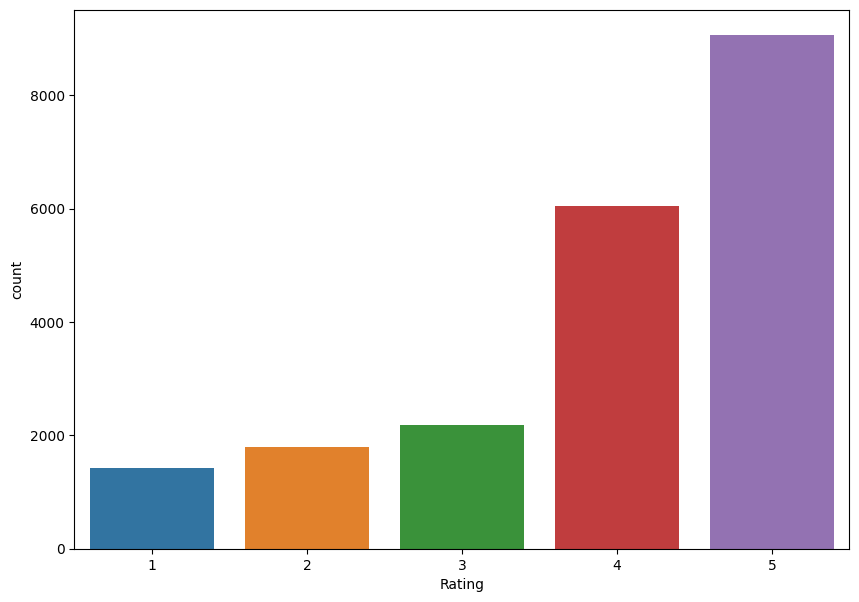

In [84]:
# graph show the distributing of the rating and the numers of ratings

countplt, show = plt.subplots(figsize = (10,7))
show =sns.countplot(data=review,x='Rating')

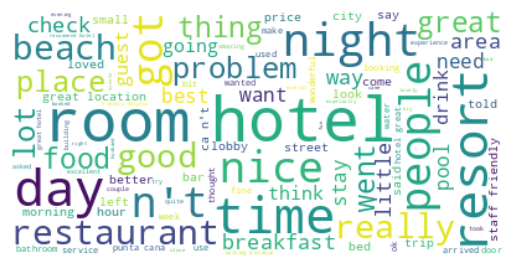

In [85]:
# word cloud
text = " ".join(review for review in review['Review'])

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Data Insight
From .describe() we got the response of (20490,2), Which means the data has 20,490 unique reviews. Also we got the Rating Mean is 3.95 which shows the average review is 4.95. From the head(10) we can see the insight of the detailed review of the top 10 column, and we can see the correlation if the reviews with the rating with some keywords -- "NICE HOTEL" got a rating of 4, "NOTHING SPECIAL" got a rating of 2. From isnull() we got that the data has no missing value which helps with the accuracy of the future predicting. From the graph we can have a better view of the distribution of the rating is heavy above 3. And from the word cloud we can see the frequency of some words like "great,nice,problem" which are some key words for analysis.

### Data Transformating
We first clean up the data before apply predicing method.

In [86]:
# change all text to lower case 
review['Review'] = review['Review'].str.lower()
review['Review']

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4* experience hotel monaco seat...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20486    best kept secret 3rd time staying charm, not 5...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside, desk staff ...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking, ca n't believe excellent ratin...
Name: Review, Length: 20491, dtype: object

In [87]:
#change to lower case 
review['Review'] = review['Review'].str.lower() 
#remove url
review['Review'] = review['Review'].replace(r'http\S+', '', regex=True)
#remove @ but does not remove the @ name 
review['Review'] = review['Review'].replace(r'@', '', regex=True)
# remoce punctuation
review['Review'] = review['Review'].apply(lambda x: x.translate (str.maketrans('', '', string.punctuation)))
# remove numbers
review['Review'] = review['Review'].apply(lambda x: x.translate (str.maketrans('', '', string.digits)))
# stop words remove
stop_word = stopwords.words('english')
# keep no and not in the review
stop_word.remove('not')
stop_word.remove('no')
review['Review'] = review['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_word)]))
# tokenize 
review['Review'] = review['Review'].apply(word_tokenize)
# show the first 10 rows of the data 
review.head(10)

,Review,Rating
0,"[nice, hotel, expensive, parking, got, good, d...",4
1,"[ok, nothing, special, charge, diamond, member...",2
2,"[nice, rooms, not, experience, hotel, monaco, ...",3
3,"[unique, great, stay, wonderful, time, hotel, ...",5
4,"[great, stay, great, stay, went, seahawk, game...",5
5,"[love, monaco, staff, husband, stayed, hotel, ...",5
6,"[cozy, stay, rainy, city, husband, spent, nigh...",5
7,"[excellent, staff, housekeeping, quality, hote...",4
8,"[hotel, stayed, hotel, monaco, cruise, rooms, ...",5
9,"[excellent, stayed, hotel, monaco, past, delig...",5


In [88]:
# Lemmatize words
word_lemmatizer = WordNetLemmatizer()

review['Review'] = review['Review'].apply(lambda x: [word_lemmatizer.lemmatize(word) for word in x])
review

,Review,Rating
0,"[nice, hotel, expensive, parking, got, good, d...",4
1,"[ok, nothing, special, charge, diamond, member...",2
2,"[nice, room, not, experience, hotel, monaco, s...",3
3,"[unique, great, stay, wonderful, time, hotel, ...",5
4,"[great, stay, great, stay, went, seahawk, game...",5
...,...,...
20486,"[best, kept, secret, rd, time, staying, charm,...",5
20487,"[great, location, price, view, hotel, great, q...",4
20488,"[ok, look, nice, modern, outside, desk, staff,...",2
20489,"[hotel, theft, ruined, vacation, hotel, opened...",1


In [89]:
# put it back to sentence
review['Review'] = review['Review'].apply(lambda x: ' '.join(x))
# add label to the Rating
review['label'] = review['Rating'].astype('string')
review['label'] = "__label__" + review['label']
# drop the rating column
review = review.drop('Rating', axis=1)
review

,Review,label
0,nice hotel expensive parking got good deal sta...,__label__4
1,ok nothing special charge diamond member hilto...,__label__2
2,nice room not experience hotel monaco seattle ...,__label__3
3,unique great stay wonderful time hotel monaco ...,__label__5
4,great stay great stay went seahawk game awesom...,__label__5
...,...,...
20486,best kept secret rd time staying charm not sta...,__label__5
20487,great location price view hotel great quick pl...,__label__4
20488,ok look nice modern outside desk staff nt part...,__label__2
20489,hotel theft ruined vacation hotel opened sept ...,__label__1


## Training 
### Training Description
We will use supervised learning to achieve the classifaction which we will know the label for the reviews that the user give. 

1. Model selection: Amazon SageMaker provide pre-built algorithms for text classification - multi class.

2. Model training: Once the dataset and model are prepared, the next step is to train the model using SageMaker. This involves specifying hyperparameters, such as the number of epochs, batch size, and learning rate, and starting the training job. SageMaker will automatically spin up the required infrastructure and distribute the training workload across multiple instances to optimize performance.

3. Model evaluation: After the model is trained, we will evaluate its performance using accuracy.


In [90]:
# Data split for training and testing with 80 training and 20 testing
train_data, validate_data = train_test_split(review, test_size=0.2)

# put the training and validate file to csv
train_data.to_csv('review.train', sep=' ', header=False, index=False, quotechar=" ")
validate_data.to_csv('review.validate', sep=' ', header=False, index=False, quotechar=" ")

In [91]:
# setting up the environment 
role = get_execution_role()
sess = sagemaker.Session() 
region = sess.boto_session.region_name
bucket = sess.default_bucket()
print("The role is ", role)
print("The session is ", sess)
print("The region is ", region)
print("The bucket is ", bucket)

The role is  arn:aws:iam::978402363809:role/LabRole
The session is  <sagemaker.session.Session object at 0x7f7114af2f50>
The region is  us-east-1
The bucket is  sagemaker-us-east-1-978402363809


In [92]:
# Copy the file to S3 bucket

prefix = 'review'
training_data_path = sess.upload_data( path='review.train', key_prefix=prefix + '/input/train') 
validation_data_path = sess.upload_data( path='review.validate', key_prefix=prefix + '/input/validate')
output_data_path = 's3://{}/{}/output'.format(bucket, prefix)
print(training_data_path)
print(validation_data_path)
print(output_data_path)

s3://sagemaker-us-east-1-978402363809/review/input/train/review.train
s3://sagemaker-us-east-1-978402363809/review/input/validate/review.validate
s3://sagemaker-us-east-1-978402363809/review/output


In [93]:
# Create your data channels

train_data = sagemaker.inputs.TrainingInput(
    training_data_path,
    distribution="FullyReplicated",
    content_type="text/plain",
    s3_data_type="S3Prefix",
)
validate_data = sagemaker.inputs.TrainingInput(
    validation_data_path,
    distribution="FullyReplicated",
    content_type="text/plain",
    s3_data_type="S3Prefix",
)
data_channels = {"train": train_data, "validation": validate_data}

In [94]:
# Create the training container

container = image_uris.retrieve(framework='blazingtext',region=region)

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: 1.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.


In [95]:
bt_model = Estimator(
    container,
    role,
    instance_count=1,
    instance_type="ml.m5.large",
    volume_size=30,
    max_run=360000,
    input_mode="File",
    output_path=output_data_path,
    hyperparameters={
        "mode": "supervised"
    },
)

### Hyperparameter Tuning

In [96]:
from sagemaker.parameter import IntegerParameter, ContinuousParameter, CategoricalParameter

hyperparameter_ranges = {
    "learning_rate": ContinuousParameter(0.01, 0.1),
    "vector_dim": IntegerParameter(10, 100),
    "word_ngrams": IntegerParameter(1, 3),
    "epochs": IntegerParameter(5, 30),
    'batch_size': CategoricalParameter([32,64,128,256,512])
}

In [97]:
metric_definitions = [
    {"Name": "validation:accuracy", "Regex": "loss (\S+)"}
]

objective_metric_name = "validation:accuracy"

In [98]:
from sagemaker.tuner import HyperparameterTuner

tuner = HyperparameterTuner(
    bt_model,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=10,
    max_parallel_jobs=2,
    objective_type="Maximize"
)

In [99]:
# Start the training and tuning

tuner.fit(inputs=data_channels, logs=True)

INFO:sagemaker:Creating hyperparameter tuning job with name: blazingtext-230326-2220


..................................................................................................................!


In [100]:
# Print out the best parameters the tuning job found

print("Best hyerparameter tuning job:{}".format(tuner.best_training_job()))
print("Best parameters found={}".format(tuner.best_estimator().hyperparameters()))

Best hyerparameter tuning job:blazingtext-230326-2220-008-76ce402e

2023-03-26 22:28:27 Starting - Found matching resource for reuse
2023-03-26 22:28:27 Downloading - Downloading input data
2023-03-26 22:28:27 Training - Training image download completed. Training in progress.
2023-03-26 22:28:27 Uploading - Uploading generated training model
2023-03-26 22:28:27 Completed - Resource retained for reuse
Best parameters found={'_tuning_objective_metric': 'validation:accuracy', 'batch_size': '256', 'epochs': '21', 'learning_rate': '0.09535758448153714', 'mode': 'supervised', 'vector_dim': '51', 'word_ngrams': '3'}


#### Turning
For hyperparameter tuning, we used the accuracy which can show the percentage that the model got right. Then we input some common value for the parameter and let it run to find the best fit value in those given values. In this module I want to check the best parameter for learning rate, vector_dim - In natural language processing (NLP), text data is typically encoded as a set of numerical vectors, where each vector represents a particular feature or word in the text. The vector_dim parameter specifies the length of these vectors, epochs, batch_size and word_ngram -  specifies the size of the n-grams used to encode the text data.

Best parameters = {'_tuning_objective_metric': 'validation:accuracy', 'batch_size': '128', 'epochs': '27', 'learning_rate': '0.03658245946234011', 'mode': 'supervised', 'vector_dim': '62', 'word_ngrams': '1'}

In [101]:
bt_model = Estimator(
    container,
    role,
    instance_count=1,
    instance_type="ml.m5.large",
    volume_size=30,
    max_run=360000,
    input_mode="File",
    output_path=output_data_path,
    hyperparameters={
        "mode": "supervised",
        "batch_size": 128,
        "epochs": 27,
        "learning_rate": 0.03658245946234011,
        'vector_dim': 62,
        'word_ngrams': 1
    },
)

In [102]:
# Train the model

bt_model.fit(inputs=data_channels, logs=True)

INFO:sagemaker:Creating training-job with name: blazingtext-2023-03-26-22-30-54-438


2023-03-26 22:30:56 Starting - Starting the training job...
2023-03-26 22:31:11 Starting - Preparing the instances for training...
2023-03-26 22:31:56 Downloading - Downloading input data...
2023-03-26 22:32:31 Training - Downloading the training image...
2023-03-26 22:32:46 Training - Training image download completed. Training in progress.Arguments: train
[03/26/2023 22:32:51 WARNING 140165131511616] Loggers have already been setup.
[03/26/2023 22:32:51 WARNING 140165131511616] Loggers have already been setup.
[03/26/2023 22:32:51 INFO 140165131511616] nvidia-smi took: 0.025230884552001953 secs to identify 0 gpus
[03/26/2023 22:32:51 INFO 140165131511616] Running single machine CPU BlazingText training using supervised mode.
Number of CPU sockets found in instance is  1
[03/26/2023 22:32:51 INFO 140165131511616] Processing /opt/ml/input/data/train/review.train . File size: 12.417811393737793 MB
[03/26/2023 22:32:51 INFO 140165131511616] Processing /opt/ml/input/data/validation/review

### Model Evaluation
The result of the algorithm is train_accuracy: 0.7088, validation_accuracy: 0.6238. Considering we need to classify 5 different labels this accuracy is acceptable. 
## Deploy
### Model Deployment
To deploy the model, we use the deploy() method of the SageMaker Estimator use the HyperparameterTuner object that represents the trained model. 

In [103]:
# Retrieve model data from training job

training_job_model_data = bt_model.model_data
training_job_model_data

's3://sagemaker-us-east-1-978402363809/review/output/blazingtext-2023-03-26-22-30-54-438/output/model.tar.gz'

In [104]:
# Create a unique model name so it won't overwrite ones taht are already there using date and time

deployed_BlazingText_model_name = "review-bt-model" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print("Model name is " + deployed_BlazingText_model_name)

Model name is review-bt-model2023-03-26-22-33-47


In [105]:
# Container Definition https://docs.aws.amazon.com/sagemaker/latest/APIReference/API_ContainerDefinition.html

client = boto3.client(service_name="sagemaker")

create_model_response = client.create_model(
    ModelName=deployed_BlazingText_model_name,
    Containers=[
        {
            "Image": container, # use the same container defined in the estimator
            "ModelDataUrl": training_job_model_data
        }
    ],
    ExecutionRoleArn=role,
)

print("Model Arn: " + create_model_response["ModelArn"])

Model Arn: arn:aws:sagemaker:us-east-1:978402363809:model/review-bt-model2023-03-26-22-33-47


In [106]:
review_epc_name = "blazingtext-serverless-epc" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())

endpoint_config_response = client.create_endpoint_config(
    EndpointConfigName=review_epc_name,
    ProductionVariants=[
        {
            "VariantName": "btVariant",
            "ModelName": deployed_BlazingText_model_name,
            "ServerlessConfig": {
                "MemorySizeInMB": 4096,
                "MaxConcurrency": 1,
            },
        },
    ],
)

print("Endpoint Configuration Arn: " + endpoint_config_response["EndpointConfigArn"])

Endpoint Configuration Arn: arn:aws:sagemaker:us-east-1:978402363809:endpoint-config/blazingtext-serverless-epc2023-03-26-22-33-48


In [107]:
review_ep_name = "twitter-serverless-ep" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())

create_endpoint_response = client.create_endpoint(
    EndpointName=review_ep_name,
    EndpointConfigName=review_epc_name,
)

print("Endpoint Arn: " + create_endpoint_response["EndpointArn"])

Endpoint Arn: arn:aws:sagemaker:us-east-1:978402363809:endpoint/twitter-serverless-ep2023-03-26-22-33-48


In [108]:
# wait for endpoint to reach a terminal state (InService) using describe endpoint

import time

describe_endpoint_response = client.describe_endpoint(EndpointName=review_ep_name)

while describe_endpoint_response["EndpointStatus"] == "Creating":
    describe_endpoint_response = client.describe_endpoint(EndpointName=review_ep_name)
    print(describe_endpoint_response["EndpointStatus"])
    time.sleep(15)

describe_endpoint_response

Creating
Creating
Creating
Creating
Creating
Creating
Creating
InService


{'EndpointName': 'twitter-serverless-ep2023-03-26-22-33-48',
 'EndpointArn': 'arn:aws:sagemaker:us-east-1:978402363809:endpoint/twitter-serverless-ep2023-03-26-22-33-48',
 'EndpointConfigName': 'blazingtext-serverless-epc2023-03-26-22-33-48',
 'ProductionVariants': [{'VariantName': 'btVariant',
   'DeployedImages': [{'SpecifiedImage': '811284229777.dkr.ecr.us-east-1.amazonaws.com/blazingtext:1',
     'ResolvedImage': '811284229777.dkr.ecr.us-east-1.amazonaws.com/blazingtext@sha256:f4a2d23762e88d6b992495a9a6384fd64f819fcbc2e143d8af222637ed6822ff',
     'ResolutionTime': datetime.datetime(2023, 3, 26, 22, 33, 49, 550000, tzinfo=tzlocal())}],
   'CurrentWeight': 1.0,
   'DesiredWeight': 1.0,
   'CurrentInstanceCount': 0,
   'CurrentServerlessConfig': {'MemorySizeInMB': 4096, 'MaxConcurrency': 1}}],
 'EndpointStatus': 'InService',
 'CreationTime': datetime.datetime(2023, 3, 26, 22, 33, 49, 51000, tzinfo=tzlocal()),
 'LastModifiedTime': datetime.datetime(2023, 3, 26, 22, 35, 26, 622000, tzi

In [109]:
# first rating is 4 and the second has a rating of 2
sentences = ["nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows",
            "warwick bad good reviews warwick shocks staff quite rude rooms fairly dirty, cut asked bandaid did not, requested bottle opener did not better service"]

runtime = boto3.Session().client('sagemaker-runtime')

payload = {"instances": sentences}

response = runtime.invoke_endpoint(
    EndpointName=review_ep_name,
    Body=json.dumps(payload),
    ContentType="application/json",
)

output = json.loads(response['Body'].read().decode('utf-8'))

print(output)                    
            

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


[{'label': ['__label__4'], 'prob': [0.6892287731170654]}, {'label': ['__label__2'], 'prob': [0.7365610003471375]}]


### Model Responce
The above section shows the response of the model when put in new reviews. The algorithm has successfully predicted the labels for the sentences that were cut from some of the reviews(with some changes). And the probability of it being correct. 
## Model Interface

In [ ]:
while True:
    user_input = input("Input 0 as EXIT, 1 to type in response")
    if user_input == "0":
        break
    elif user_input == "1":
        reviews = input("Please write your review on Smith Hotel, Thanks for visiting")
        reviews = [reviews]
        runtime = boto3.Session().client('sagemaker-runtime')
        payload1 = {"instances": reviews}
        response = runtime.invoke_endpoint(
            EndpointName=review_ep_name,
            Body=json.dumps(payload1),
            ContentType="application/json",
        )
        output = json.loads(response['Body'].read().decode('utf-8'))
        print(output)         
    

Input 0 as EXIT, 1 to type in response 1


An example of model interface:
Input 0 as EXIT, 1 to type in response 1

Please write your review on Smith Hotel, Thanks for visiting warwick bad good reviews warwick shocks staff quite rude rooms fairly dirty, cut asked bandaid did not, requested bottle opener did not better service

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole

[{'label': ['__label__2'], 'prob': [0.7365610003471375]}]

Input 0 as EXIT, 1 to type in response 0

In [ ]:
# delete the model endpoint
# https://docs.aws.amazon.com/sagemaker/latest/dg/realtime-endpoints-delete-resources.html
client.delete_model(ModelName=deployed_BlazingText_model_name)
client.delete_endpoint_config(EndpointConfigName=review_epc_name)
client.delete_endpoint(EndpointName=review_ep_name)